<a href="https://colab.research.google.com/github/bhyeon1/Haribo_CNN/blob/main/Haribo_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/haribo_data'

In [ ]:
data_path

'/content/drive/MyDrive/Colab Notebooks/haribo_data'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/haribo_data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/haribo_data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 192 images belonging to 6 classes.
Found 48 images belonging to 6 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation='softmax')  # 클래스 수 자동 반영
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1653 - loss: 1.8219 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 104s 18s/step - accuracy: 0.1692 - loss: 1.8191 - val_accuracy: 0.1667 - val_loss: 1.7299
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.2169 - loss: 1.6878 - val_accuracy: 0.4583 - val_loss: 1.4916
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.4589 - loss: 1.3589 - val_accuracy: 0.5417 - val_loss: 1.1217
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.6458 - loss: 1.0206 - val_accuracy: 0.5208 - val_loss: 0.9746
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7694 - loss: 0.7647 - val_accuracy: 0.7083 - val_loss: 0.6667
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8230 - loss: 0.5781 - val_accuracy: 0.7500 - val_loss: 0.6601
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8649 - loss: 0.4251 - val_accuracy: 0.8125 - val_loss: 0.6561
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.8035 - loss: 0.4802 - val_accuracy: 0.7292 - val_loss: 0.5977
Epoch 9/10
6/6 ━━

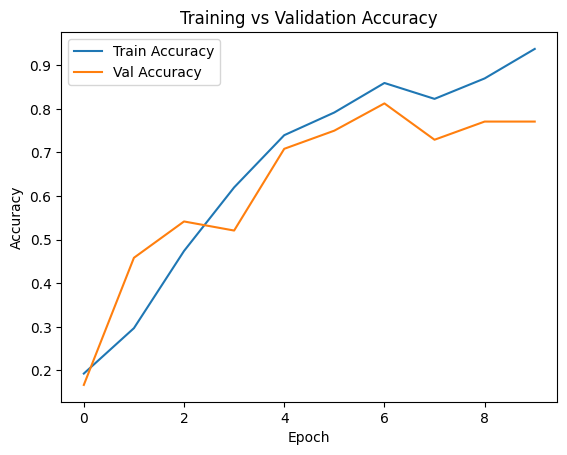

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()